In [152]:
import cv2
import glob
import numpy as np
from sklearn.preprocessing import normalize
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
!ls /content/drive/MyDrive/photometric_stereo/hippo

Ierr.log	      LightProbe-1  ManualData	refined_light.txt
light_directions.txt  LightProbe-2  Objects	result.mat


In [155]:
img = 'hippo'
light = np.loadtxt(f'/content/drive/MyDrive/photometric_stereo/{img}/light_directions.txt')
light, light.shape

(array([[-3.50853298e-01, -3.28731979e-01, -2.86363073e-01,
         -3.26085918e-01, -3.20314177e-01, -1.48529273e-01,
         -1.41805209e-01, -1.45351028e-01, -1.48676158e-01,
         -1.17701924e-01,  1.48296368e-01,  1.85425304e-01,
          1.76503385e-01,  1.83645638e-01,  1.58561019e-01,
          3.39394966e-01,  3.47991934e-01,  4.30194121e-01,
          4.17691709e-01,  4.43409540e-01],
        [ 5.35611595e-01,  3.99303561e-01,  1.46918899e-01,
         -1.92350752e-03, -1.97946525e-01,  3.96369438e-01,
          2.81259719e-01, -4.43176619e-02, -2.18850873e-01,
         -3.84562144e-01,  3.84437598e-01,  2.54002278e-01,
          1.87391645e-04, -2.28891986e-01, -3.87970425e-01,
          5.97435234e-01,  5.13990377e-01,  2.98754436e-01,
          7.48335643e-02, -5.15490792e-02],
        [ 7.68129014e-01,  8.55857437e-01,  9.46789854e-01,
          9.45338180e-01,  9.26399483e-01,  9.05996867e-01,
          9.49096546e-01,  9.88387082e-01,  9.64364918e-01,
          9.

In [156]:
folder_name = f'/content/drive/MyDrive/photometric_stereo/{img}/Objects/'
ext = "png"
file_list = sorted(glob.glob(folder_name + "*." +ext))
print(file_list)

['/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_01.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_02.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_03.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_04.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_05.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_06.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_07.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_08.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_09.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_10.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_11.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_12.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_13.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_

In [157]:
I = None
height = 0
width =0
for file_name in file_list:
  im =  cv2.imread(file_name).astype(np.float64)
  im = np.mean(im, axis=2)
  height, width = im.shape
  if I is None:
    I = im.reshape((-1,1))
  else:
    I = np.append(I, im.reshape(-1, 1), axis = 1)
I, I.shape, height, width

(array([[3., 6., 8., ..., 7., 7., 6.],
        [4., 7., 8., ..., 7., 8., 6.],
        [3., 6., 8., ..., 7., 8., 6.],
        ...,
        [1., 1., 2., ..., 1., 1., 1.],
        [1., 1., 2., ..., 4., 2., 2.],
        [1., 1., 1., ..., 3., 2., 2.]]),
 (336400, 20),
 580,
 580)

In [158]:
N_vector = np.linalg.lstsq(light.T, I.T, rcond=None)[0].T
# N_norm = normalize(N, axis = 1)
N_norm = N_vector.copy()
N_norm.shape, N_norm[1]

((336400, 3), array([1.65405524, 7.89525572, 5.10750705]))

In [159]:
albedo = np.linalg.norm(N_vector,axis = 1)
albedo, albedo.shape

(array([8.94458091, 9.5476484 , 9.25332242, ..., 1.85085438, 3.25115486,
        2.22582513]),
 (336400,))

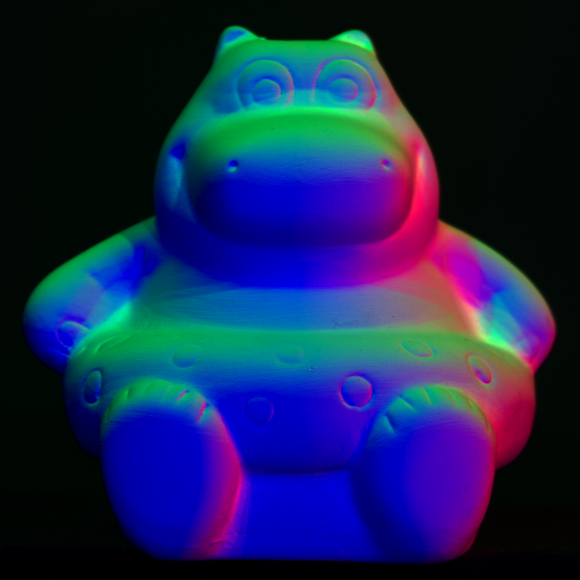

In [160]:
normal_map = np.reshape(N_norm, (height, width, 3))
temp = normal_map[:, :, 0].copy()
normal_map[:, :, 0] =normal_map[:, :, 2]
normal_map[:,:, 2] = temp
cv2_imshow(normal_map)

In [161]:
N_vector[1]

array([1.65405524, 7.89525572, 5.10750705])

In [162]:
N = normalize(N_vector, axis = 1)
z = N[:,2]
N = N[:, :] / z[:, np.newaxis]
N[1], N.shape

(array([0.32384786, 1.54581396, 1.        ]), (336400, 3))

In [163]:
N = N.reshape((height, width, 3))
N, N.shape

(array([[[ 0.34582807,  1.44995295,  1.        ],
         [ 0.32384786,  1.54581396,  1.        ],
         [ 0.4286385 ,  1.47548953,  1.        ],
         ...,
         [ 0.55715531,  1.61926179,  1.        ],
         [ 0.49382946,  1.59633528,  1.        ],
         [ 0.54812883,  1.62133452,  1.        ]],
 
        [[ 0.33444966,  1.56263676,  1.        ],
         [ 0.28414173,  1.53136964,  1.        ],
         [ 0.27586478,  1.56977367,  1.        ],
         ...,
         [ 0.44650842,  1.54297772,  1.        ],
         [ 0.56141788,  1.63699545,  1.        ],
         [ 0.46694176,  1.57719655,  1.        ]],
 
        [[ 0.42223126,  1.40434615,  1.        ],
         [ 0.35734801,  1.39040909,  1.        ],
         [ 0.40818041,  1.42933875,  1.        ],
         ...,
         [ 0.53931456,  1.52224899,  1.        ],
         [ 0.58750977,  1.51654645,  1.        ],
         [ 0.57489428,  1.58203837,  1.        ]],
 
        ...,
 
        [[-0.1235602 , -0.40152509

In [164]:
P_f = fft2(N[:,:,0])
Q_f = fft2(N[:,:,1])

In [165]:
y = np.linspace(1,height, height).astype(np.int32)
x = np.linspace(1, width, width).astype(np.int32)
X, Y = np.meshgrid(x, y)

In [166]:
x, x.shape

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [167]:
u = np.fft.fftfreq(width, d=(x[1] - x[0]))
v = np.fft.fftfreq(height, d=(y[1] - y[0]))
U, V = np.meshgrid(u, v)

In [168]:
u

array([ 0.        ,  0.00172414,  0.00344828,  0.00517241,  0.00689655,
        0.00862069,  0.01034483,  0.01206897,  0.0137931 ,  0.01551724,
        0.01724138,  0.01896552,  0.02068966,  0.02241379,  0.02413793,
        0.02586207,  0.02758621,  0.02931034,  0.03103448,  0.03275862,
        0.03448276,  0.0362069 ,  0.03793103,  0.03965517,  0.04137931,
        0.04310345,  0.04482759,  0.04655172,  0.04827586,  0.05      ,
        0.05172414,  0.05344828,  0.05517241,  0.05689655,  0.05862069,
        0.06034483,  0.06206897,  0.0637931 ,  0.06551724,  0.06724138,
        0.06896552,  0.07068966,  0.07241379,  0.07413793,  0.07586207,
        0.07758621,  0.07931034,  0.08103448,  0.08275862,  0.08448276,
        0.0862069 ,  0.08793103,  0.08965517,  0.09137931,  0.09310345,
        0.09482759,  0.09655172,  0.09827586,  0.1       ,  0.10172414,
        0.10344828,  0.10517241,  0.10689655,  0.10862069,  0.11034483,
        0.11206897,  0.1137931 ,  0.11551724,  0.11724138,  0.11

In [169]:
epsilon = 1e-6
denom = (U**2 + V**2) + epsilon
Z_f = (1j * U * P_f + 1j * V * Q_f) / denom

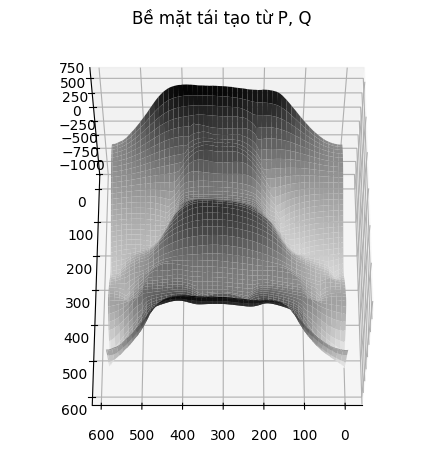

In [175]:
Z_reconstructed = np.real(ifft2(Z_f))

# Hiển thị kết quả
fig = plt.figure(figsize=(12, 6))


# Ảnh tái tạo
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z_reconstructed, cmap='gist_yarg')
ax2.set_title("Bề mặt tái tạo từ P, Q")
ax2.view_init(elev=60, azim=90)
plt.show()

In [171]:
# import numpy as np
import plotly.graph_objects as go

# # Tạo dữ liệu
# x = np.linspace(-5, 5, 50)
# y = np.linspace(-5, 5, 50)
# X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))

# Vẽ đồ thị 3D
fig = go.Figure(data=[go.Surface(z=Z_reconstructed, x=X, y=Y, colorscale='Viridis')])
fig.show()
